# <font color='blue'> UNISINOS - ESPECIALIZAÇÃO EM BIGA DATA, DATA SCIENCE E DATA ANALYTICS

##### <font color='blue'> PROFa. PATRICIA KUYVEN
    
## <font color='blue'> Grupo: Cesar Beck e John Castillo.
    
## Tarefa 02 - Análise Exploratória (German Credit Data)

    Ver também: https://wiki.python.org.br/Tutorial_Python


In [55]:
#Importanto bibliotecas
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt


## 1.1 Abrindo/lendo e manipulando bases de dados 
Ver:
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html


In [102]:
# lendo csv com o pandas  
dataset=pd.read_csv('file:germandataset.csv', sep=',')
dataset

ParserError: Error tokenizing data. C error: Expected 1 fields in line 123, saw 2


In [91]:
# saber quais as colunas do dataset
dataset.columns

Index(['A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1'], dtype='object')

In [62]:
# saber quantas respostas tem em cada coluna do dataset
dataset.count()
#dataset['curso'].count()

curso                370
disciplina           370
grau_exig            370
modalidade           370
media_notas_ant      370
num_disc_evadidas    370
mensal_atraso        370
sexo                 370
idade                370
dist                 370
sem                  370
tamanho_turma        370
sit                  333
dtype: int64

In [63]:
# estatísticas básicas das variáveis do dataset
dataset.describe()

,grau_exig,modalidade,num_disc_evadidas,mensal_atraso,idade,dist,sem,tamanho_turma,sit
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,333.000000
mean,2.097297,1.254054,0.683784,0.872973,23.391892,1.578378,3.851351,34.335135,0.264264
std,0.878063,0.435918,1.198466,1.538159,3.793510,0.747583,1.928832,8.222918,0.441604
min,1.000000,1.000000,0.000000,0.000000,18.000000,1.000000,1.000000,20.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,20.000000,1.000000,2.000000,27.250000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,23.000000,1.000000,4.000000,35.000000,0.000000
75%,3.000000,2.000000,1.000000,1.000000,26.000000,2.000000,5.000000,41.000000,1.000000
max,3.000000,2.000000,7.000000,10.000000,37.000000,3.000000,7.000000,50.000000,1.000000


In [64]:
pd.value_counts(dataset['disciplina'])

Métodos Estatísticos           102
Gestão de Projetos              75
Matemática financeira           53
Cálculo A                       45
Planejamento contábil           29
Estratégias de marketing        28
Comportamento do consumidor     23
Cálculo B                       15
Name: disciplina, dtype: int64

In [65]:
#cruzamento de variáveis usando groupby: quali com quanti
dataset_meanTTurma=dataset.groupby(['disciplina','curso'],as_index=False).agg({'tamanho_turma':['mean','max']})
dataset_meanTTurma

disciplina                   curso tamanho_turma    
                                                                 mean max
0   Comportamento do consumidor           Administração     35.434783  50
1                     Cálculo A           Administração     33.060606  43
2                     Cálculo A  Engenharia de Produção     33.666667  43
3                     Cálculo B  Engenharia de Produção     27.600000  42
4      Estratégias de marketing           Administração     35.035714  50
5            Gestão de Projetos           Administração     35.428571  50
6            Gestão de Projetos  Engenharia de Produção     31.400000  43
7            Gestão de Projetos      Gestão da Produção     36.400000  50
8         Matemática financeira           Administração     34.914286  43
9         Matemática financeira      Gestão da Produção     34.222222  43
10         Métodos Estatísticos           Administração     35.428571  50
11         Métodos Estatísticos  Engenharia de Produção     33.000000  43
12         Métodos Estatísticos      Gestão da Produção     34.903226  50
13        Planejamento contábil           Administração     34.068966  43

In [66]:
# ler a bade de dados segundo um critério/filtro
dt_gestao = dataset.loc[dataset['curso']=="Gestão da Produção"]

In [67]:
# ler a base de dados segundo três critérios
dataset.loc[(dataset['curso']=="Gestão da Produção") & ( dataset['modalidade'] == 1) & (dataset['grau_exig'] == 1)]

,curso,disciplina,grau_exig,modalidade,media_notas_ant,num_disc_evadidas,mensal_atraso,sexo,idade,dist,sem,tamanho_turma,sit
11,Gestão da Produção,Gestão de Projetos,1,1,5.7,0,0,F,20,2,2,35,0.0
39,Gestão da Produção,Gestão de Projetos,1,1,6.4,0,1,M,24,2,2,40,0.0
78,Gestão da Produção,Gestão de Projetos,1,1,6.6,0,1,M,21,1,1,25,1.0
81,Gestão da Produção,Gestão de Projetos,1,1,6.6,2,0,M,25,1,3,25,0.0
148,Gestão da Produção,Gestão de Projetos,1,1,7.3,0,0,F,20,1,3,40,0.0
163,Gestão da Produção,Gestão de Projetos,1,1,7.3,0,0,F,27,2,5,25,0.0
224,Gestão da Produção,Gestão de Projetos,1,1,7.9,2,0,M,24,1,1,35,1.0
268,Gestão da Produção,Gestão de Projetos,1,1,8.2,0,5,M,24,3,1,41,0.0
276,Gestão da Produção,Gestão de Projetos,1,1,8.2,1,0,F,19,1,4,37,1.0
306,Gestão da Produção,Gestão de Projetos,1,1,"9,0",0,0,M,20,3,3,41,0.0


In [68]:
# cria nova coluna a partir de outra
dataset['nova_variavel'] = (dataset["idade"]*15)
dataset['nova_variavel']
dataset['nova_variavel'].head(15)
dataset

,curso,disciplina,grau_exig,modalidade,media_notas_ant,num_disc_evadidas,mensal_atraso,sexo,idade,dist,sem,tamanho_turma,sit,nova_variavel
0,Administração,Estratégias de marketing,1,2,4.5,6,1,F,24,1,6,50,1.0,360
1,Gestão da Produção,Matemática financeira,2,1,4.6,7,2,F,25,1,3,35,1.0,375
2,Gestão da Produção,Métodos Estatísticos,3,2,4.8,5,4,M,22,3,4,33,1.0,330
3,Gestão da Produção,Matemática financeira,2,2,4.9,4,7,M,26,2,1,25,1.0,390
4,Gestão da Produção,Métodos Estatísticos,3,1,5.3,5,0,F,18,3,7,30,NaN,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,Administração,Comportamento do consumidor,1,1,9.4,0,3,F,29,2,7,20,NaN,435
366,Administração,Planejamento contábil,2,1,9.4,0,0,M,21,1,7,30,NaN,315
367,Gestão da Produção,Gestão de Projetos,1,2,9.6,0,0,M,19,2,1,20,0.0,285
368,Administração,Estratégias de marketing,1,2,9.6,0,0,M,28,1,4,20,0.0,420


In [69]:
#substituir valores de variáveis
dataset['sit_aluno']=np.where(((dataset['sit']==0.0)),'concluiu',
                              np.where(((dataset['sit']==1.0)),'evadiu',None))
pd.value_counts(dataset['sit_aluno'])


concluiu    245
evadiu       88
Name: sit_aluno, dtype: int64

In [70]:
# categorizar/agrupar respostas de uma variável 
categ_turma = []
for i in dataset['tamanho_turma']:
    if i <= 35: 
        categ_turma.append('Pequena')
    elif i >35 and i <=45:
        categ_turma.append('Média')
    else:
        categ_turma.append('Grande')

dataset['categ_turma']=categ_turma


dataset['categ_turma'] 

0       Grande
1      Pequena
2      Pequena
3      Pequena
4      Pequena
        ...   
365    Pequena
366    Pequena
367    Pequena
368    Pequena
369    Pequena
Name: categ_turma, Length: 370, dtype: object

In [71]:
# Verificar a contagem dessa coluna
pd.value_counts(dataset['categ_turma'])

Pequena    211
Média      138
Grande      21
Name: categ_turma, dtype: int64

In [72]:
#Cruzamento de duas variáveis qualitativas
print(pd.crosstab(dataset['categ_turma'], dataset['sit'],rownames=['Tamanho da turma'],colnames=['Situação de evasão'], margins=True))

Situação de evasão  0.0  1.0  All
Tamanho da turma                 
Grande                6   12   18
Média                89   36  125
Pequena             150   40  190
All                 245   88  333


In [73]:
dataset.columns

Index(['curso', 'disciplina', 'grau_exig', 'modalidade', 'media_notas_ant',
       'num_disc_evadidas', 'mensal_atraso', 'sexo', 'idade', 'dist', 'sem',
       'tamanho_turma', 'sit', 'nova_variavel', 'sit_aluno', 'categ_turma'],
      dtype='object')

In [74]:
# Contagem de missing/nulos por coluna do dataset
dataset.isnull().sum()

curso                 0
disciplina            0
grau_exig             0
modalidade            0
media_notas_ant       0
num_disc_evadidas     0
mensal_atraso         0
sexo                  0
idade                 0
dist                  0
sem                   0
tamanho_turma         0
sit                  37
nova_variavel         0
sit_aluno            37
categ_turma           0
dtype: int64

## 1.4 Gráficos
Ver: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

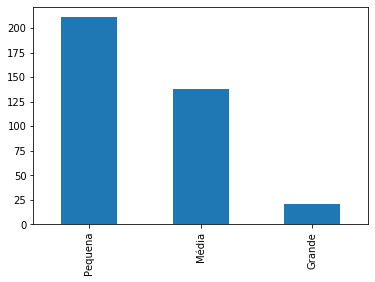

In [75]:
# gráfico de barras para frequências

dataset.categ_turma.value_counts().plot(kind='bar')
plt.show()

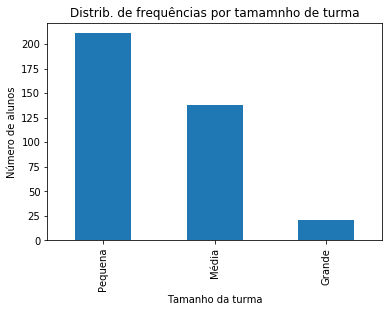

In [76]:
# acrescentando títulos
dataset.categ_turma.value_counts().plot(kind='bar')
plt.title('Distrib. de frequências por tamamnho de turma')
plt.xlabel('Tamanho da turma')
plt.ylabel('Número de alunos')
plt.show()

In [77]:
dataset.groupby('categ_turma')['num_disc_evadidas'].mean()

categ_turma
Grande     0.761905
Média      0.673913
Pequena    0.682464
Name: num_disc_evadidas, dtype: float64

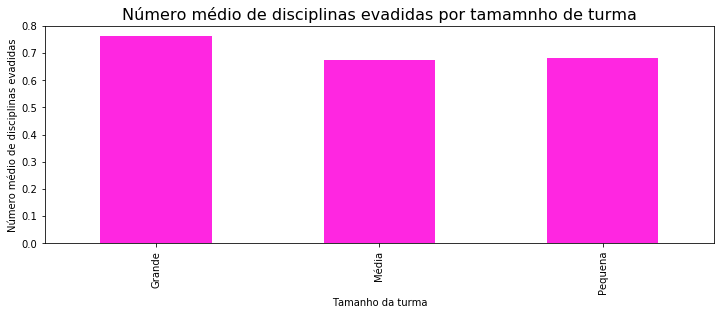

In [78]:
# cruzamento de variável quali com quanti
# barras representado a média de uma variável quantitativa
dataset.groupby('categ_turma')['num_disc_evadidas'].mean().plot(
    kind='bar',figsize=(12, 4),color='#FF26E1' )
plt.title('Número médio de disciplinas evadidas por tamamnho de turma',fontsize= 16)
plt.xlabel('Tamanho da turma')
plt.ylabel('Número médio de disciplinas evadidas')
plt.show()


In [79]:
dataset.groupby('categ_turma')['num_disc_evadidas'].mean()

categ_turma
Grande     0.761905
Média      0.673913
Pequena    0.682464
Name: num_disc_evadidas, dtype: float64

sit_aluno,concluiu,evadiu,perc_evad
categ_turma,,,
Grande,6,12,66.666667
Média,89,36,28.800000
Pequena,150,40,21.052632


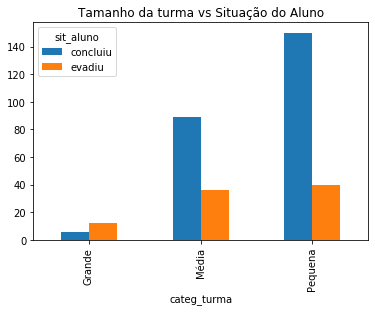

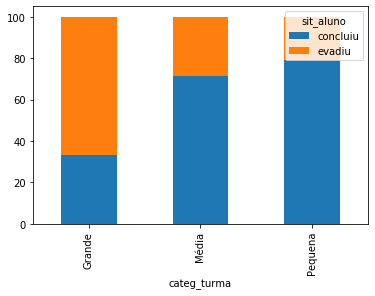

In [80]:
pd.crosstab(dataset.categ_turma,dataset.sit_aluno).plot(kind='bar',figsize=(6, 4))
plt.title('Tamanho da turma vs Situação do Aluno')
dataset.groupby(['categ_turma','sit_aluno']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True,figsize=(6, 4))

A=pd.crosstab(dataset['categ_turma'],dataset['sit_aluno'])
A['perc_evad'] = A['evadiu']/(A['concluiu']+A['evadiu'])*100
A

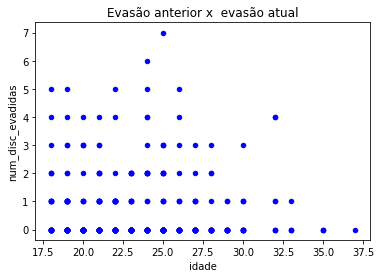

In [86]:
dataset.plot(x='idade',y='num_disc_evadidas',kind='scatter', title='Evasão anterior x  evasão atual',color='b')

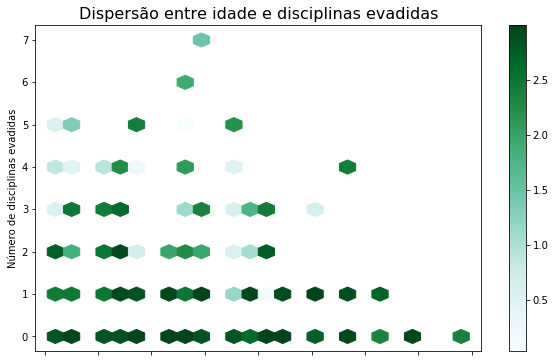

In [82]:
dataset['z'] = np.random.uniform(0, 3, 370)
dataset.plot.hexbin(x='idade', y='num_disc_evadidas', C='z', reduce_C_function=np.max, gridsize=25,figsize=(10, 6))
plt.title('Dispersão entre idade e disciplinas evadidas',fontsize= 16)
plt.xlabel('Idade')
plt.ylabel('Número de disciplinas evadidas')
plt.show()

In [83]:
dataset['idade'].corr(dataset['num_disc_evadidas'])


-0.05254388398024018

In [84]:
#salvar um arquivo csv:
dataset.to_csv("bd_evasao_apos_aula4.csv",index=False)

Ver também: https://plotly.com/python/basic-charts/